<a href="https://www.kaggle.com/code/daltongabrielomondi/intro-to-decision-trees-ipynb?scriptVersionId=188989414" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import sys
import IPython

from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.linear_model import LinearRegression as lm
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Decision Trees

- Decision trees are widely used models for classification and regression tasks.

- Essentially, they learn a hierarchy of if/else questions, leading to a decision.

Imagine you want to distinguish between the following four animals:

    - bears,
    - hawks,
    - penguins, and
    - dolphins.
- Your goal is to get to the right answer by asking as few if/else
questions as possible.

- You might start off by asking whether the animal has **feathers,** a
question that narrows down your possible animals to just two.

- If the answer is “yes,”
you can ask another question that could help you distinguish between hawks and
penguins. For example, you could ask whether the animal can **fly**.

- If the animal
doesn’t have feathers, your possible animal choices are dolphins and bears, and you
will need to ask a question to distinguish between these two animals—for example,
asking whether the animal has **fins**.

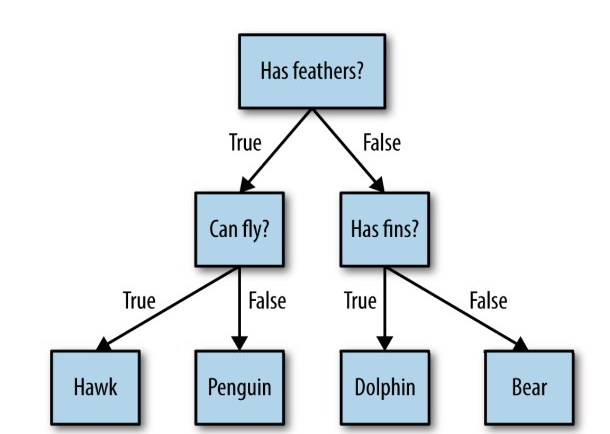


Here, each node either represents a question or a terminal node also called a **leaf**.

- Learning a decision tree means learning the sequence of if/else questions that gets us
to the true answer most quickly.

- In the machine learning setting, these questions are
called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is).

- Usually data does not come in the form of binary
yes/no features, but is instead represented as continuous features.
- The tests that are used on continuous data are of the form “Is feature i larger than value a?”


### We will build a decision tree for a classification problem

*(Classifying 2D data)*

Below is the shape of the data when graphed:

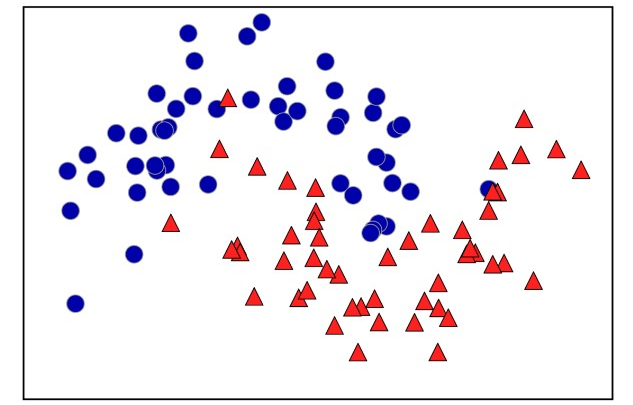

- To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.
- In the figure below, the first test that we pick is splitting the dataset vertically at x[1]=0.0596 as it yields the most information; it best separates the points in class 1 from the points in class 2. 
- The next figure shows the next decision boundary that has been evaluated.

- The top node, also called the root, represents the whole dataset
-  The first split is done by testing whether x[1] <= 0.0596,indicated by a black line. If the test is true, a point is assigned to the left node, which contains 2 points belonging to class 0 and 32 points belonging to class 1
- This recursive process yields a binary tree of decisions, with each node containing a test.

- Doing this iteratively yields an optimal decision boundary that best classifies the datapoints.

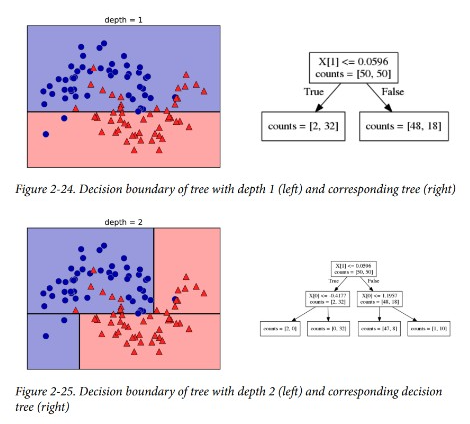

### Overfitting in Decision Trees

- But what happens when we keep going deeper in our analysis?
- Well the dataset learns the training set better and better but performs poorly on the test set -- This is overfitting


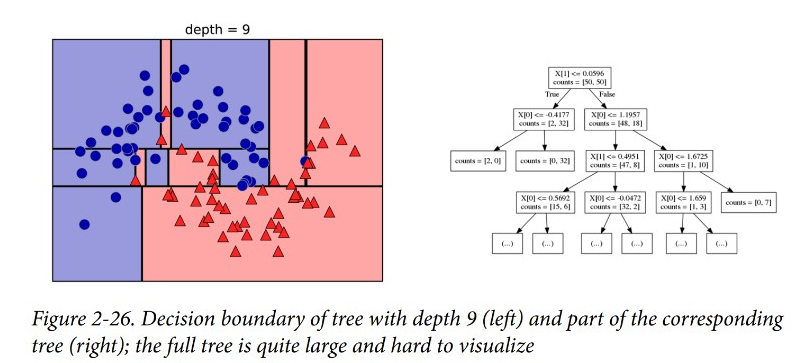

- The model is too accurate in clustering the datapoints but its easy to see how unuseful and impractical this becomes to us.

### Controlling complexity of decision trees

- To control how well decision trees learn data we can:
   - Stop the creation of the tree early (also called pre-pruning)
   - Build the tree but then removing or collapsing nodes that contain little information (also called post-pruning or just pruning)
   
#### Pre-pruning
- Here we can:
   - Limit max depth of the tree
   - Limit number of leaves of the tree
   - Insist on a certain minimun number of nodes in a leaf to keep splitting

- Decision trees in scikit-learn are implemented in the DecisionTreeRegressor and DecisionTreeClassifier classes.
- scikit-learn only implements pre-pruning, not post-pruning.
- Decision trees in scikit-learn are implemented in the DecisionTreeRegressor and DecisionTreeClassifier classes. 
- scikit-learn only implements pre-pruning, not post-pruning.

## Overview of decision tree on the scikit learn breast cancer dataset

- We look at the effect of pre-pruning in more detail on the Breast Cancer dataset
- We will build a model using the default setting of fully developing the tree (growing the tree untilall leaves are pure).
- We fix the random_state in the tree, which is used for tiebreaking internally:
   

In [2]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


- As expected, the accuracy on the training set is 100%—because the leaves are pure,the tree was grown deep enough that it could perfectly memorize all the labels on the training data.
- We could get better accuracy by pre-pruning this tree.
- We will do this by restricting the depth of the decision tree, to avoid the tree becoming arbitrarily deep and complex. 

In [3]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

# Acurracy on training data is lower but that on test set is higher

Accuracy on training set: 0.988
Accuracy on test set: 0.951


## Analyzing decision trees
We can visualize the tree using the export_graphviz function from the tree module.
This writes a file in the .dot file format, which is a text file format for storing graphs.

We set an option to color the nodes to reflect the majority class in each node and pass
the class and features names so the tree can be properly labeled:

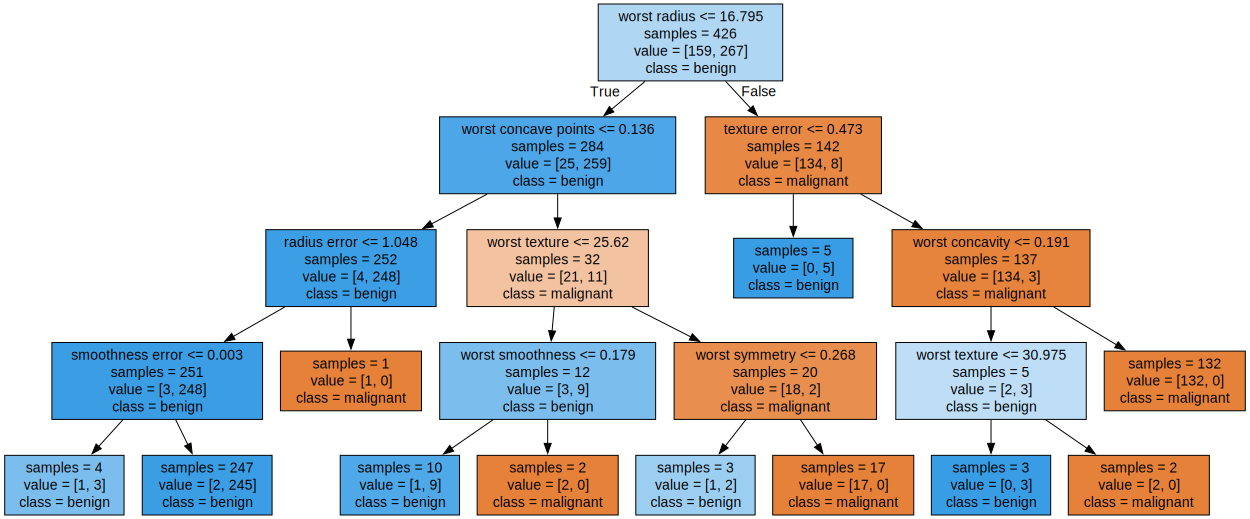

In [4]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
 feature_names=cancer.feature_names, impurity=False, filled=True)

# let's visualize it using the graphviz module (you can use any program that can read .dot files)

import graphviz
with open("tree.dot") as f:
 dot_graph = f.read()
graphviz.Source(dot_graph)

- Even with a tree of depth four, as seen here, the tree can become a bit overwhelming. Deeper trees (a depth of 10 is not uncommon) are even harder to grasp.
- One method of inspecting the tree that may be helpful is to find out which path most of the data actually take.

 *PS: The n_samples shown in each node above gives the number of samples in that node, while value provides the number of samples per class.*
 
 ## Feature importance in trees ( feature engineering)
 
 - Involves choosing only the features that are of significant impact on the analysis to save on time, computation and accuracy.
 - It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target.”
 - The feature importances always sum to 1:

In [5]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


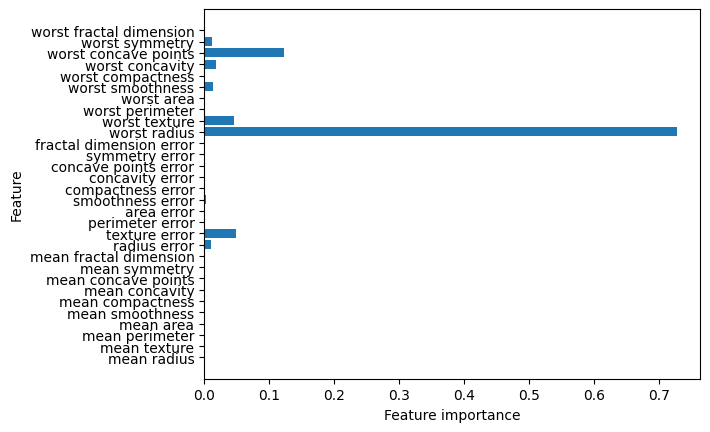

In [6]:
# a better visualization is this
def plot_feature_importances_cancer(model):
 n_features = cancer.data.shape[1]
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), cancer.feature_names)
 plt.xlabel("Feature importance")
 plt.ylabel("Feature")
plot_feature_importances_cancer(tree)

- Here we see that the feature used in the top split (“worst radius”) is by far the most important feature.
- This confirms our observation in analyzing the tree that the first level already separates the two classes fairly well.

- However, if a feature has a low feature_importance, it doesn’t mean that this feature is uninformative. 
- It only means that the feature was not picked by the tree, likely because another feature encodes the same information.

- This becomes a problem when the decision tree does not pick a feature that could have resulted to a better performance.
- That is where optimal decision trees come in.
- As of 2023, **Gradient Based decision trees** have shown to be the most optimal DTs, especially for handling the issue hitherto, that is **Bias** and **overfitting** . 



      (Marton, S., Lüdtke, S., Bartelt, C., & Stuckenschmidt, H. (2023). GradTree: Learning axis-aligned decision trees with gradient descent. University of Mannheim and University of Rostock.)
      
      Benefits of optimized DTs using gradient descent

   -  Example 1; The Echocardiogram dataset (Dua and Graff 2017) deals with predicting one-year survival of patients after a heart attack based on tabular data from an echocardiogram. Figure 1 shows two DTs. The tree on the left is learned by a greedy algorithm (CART) while the one on the right is learned with our gradient-based approach. We can observe that the greedy procedure leads to a tree with a significantly lower performance. Splitting on the wall-motion-score is the locally optimal split (see Figure 1a), but globally, it is beneficial to split based on the wall-motion-score with different values conditioned on the pericardial-effusion in the second level.
   
   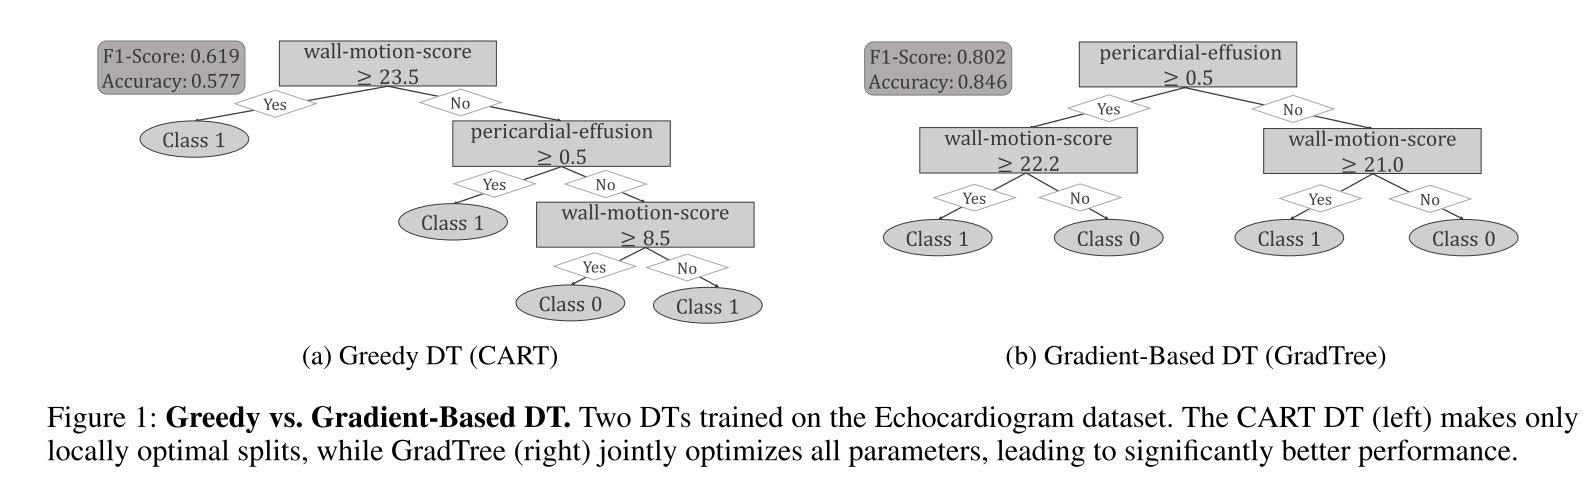

The feature importances
tell us that “worst radius” is important, but not whether a high radius is indicative of a
sample being benign or malignant. 

In fact, there might not be such a simple relation‐
ship between features and class.


## Decision Tree Regressor

- Decision trees can also be used for regression analysis.
- NOTE: The DecisionTreeRegressor (and all other tree-based regression models) is not able to extrapolate, or make predictions outside of the range of the training data.

     date        price
0  1957.0  411041792.0
1  1959.0   67947725.0
2  1960.0    5242880.0
3  1965.0    2642412.0
4  1970.0     734003.0


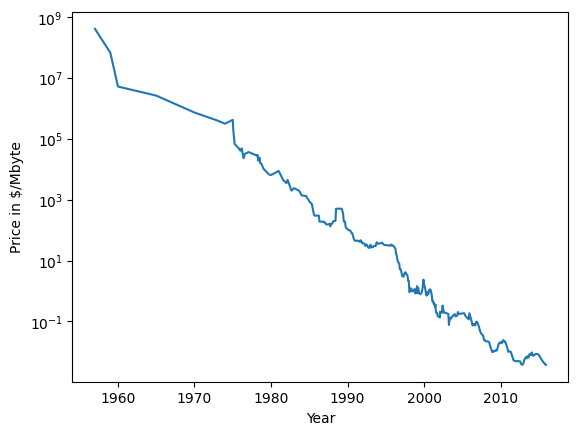

In [7]:

ram_prices = pd.read_csv('/kaggle/input/ram-price-csv/ram_price.csv', index_col=0)
print(ram_prices.head())
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")
plt.show()

#  date is on the x-axis and the price of one megabyte of RAM in that year is on the y-axis:

     date        price
0  1957.0  411041792.0
1  1959.0   67947725.0
2  1960.0    5242880.0
3  1965.0    2642412.0
4  1970.0     734003.0


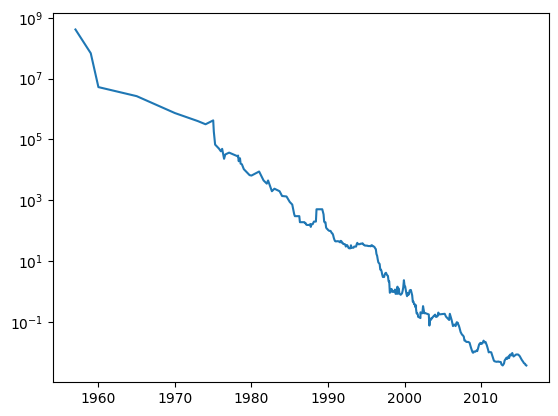

In [8]:
print(ram_prices.head())
plt.semilogy(ram_prices.date, ram_prices.price)

- Note the logarithmic scale of the y-axis. When plotting logarithmically, the relation seems to be quite linear and so should be relatively easy to predict, apart from some bumps.
- We will make a forecast for the years after 2000 using the historical data up to that point, with the date as our only feature.
- We will compare two simple models: a DecisionTreeRegressor and LinearRegression.
- We rescale the prices using a logarithm, so that the relationship is relatively linear. This doesn’t make a difference for
the DecisionTreeRegressor, but it makes a big difference for LinearRegression

In [9]:

# Split data into training and test sets
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# Prepare training data
X_train = data_train.date.values.reshape(-1, 1)
y_train = np.log(data_train.price)

# Train models
tree = DTR().fit(X_train, y_train)
linear_reg = lm().fit(X_train, y_train)

# Predict on all data
X_all = ram_prices.date.values.reshape(-1, 1)
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# Undo log-transform to get prices
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

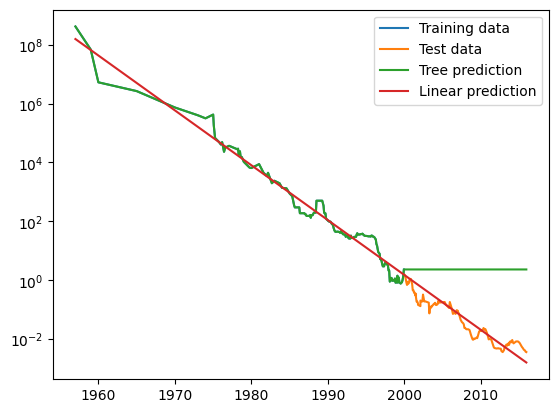

In [10]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()
plt.show()

- The difference between the models is quite striking. 
- The linear model approximates the data with a line, as we knew it would. This line provides quite a good forecast for the test data (the years after 2000), while glossing over some of the finer variations in both the training and the test data. 
- The tree model, on the other hand, makes perfect predictions on the training data; we did not restrict the complexity of the tree, so it learned the whole dataset by heart. However, once we leave the data range for which the model has data, the model simply keeps predicting the last known point. The tree has no ability to generate “new” responses, outside of what was seen in the training data. 
- This shortcoming applies to all models based on trees.


- Params to control model complexity are the prepruning params that stop the building of the tree before it is fully developed. 
  - picking one of the pre-pruning strategies—setting either **max_depth, max_leaf_nodes, or min_samples_leaf**—is sufficient to prevent overfitting.
  
##### **Advantages of DTs**

Decision trees have two main advantages  
  - the result can easily be visualized and understood by nonexperts (at least for smaller trees)
  - the algorithms are completely invariant to scaling of the data. As each feature is processed separately, and the possible splits of the data don’t depend on scaling, no preprocessing like normalization or standardization of features is needed for decision tree algorithms. 
  - In particular, decision trees work well when you have features that are on completely different scales, or a mix of binary and continuous features.
  
##### **Main disadvantage**

Even with prepruning, they still tend to overfit.

**Solution** - Ensemble methods are deployed to solve this

### Ensembles of Decision Trees

Ensembles combine multiple machine learning models to create
more powerful models.

Two important ensemble methods built using decision trees are:

     - Random forests
     - Gradient boosted decision trees.
 
 - A random forest is essentially a collection of decision trees, where each tree is slightly different from  the others.
     - Random forests for regression and classification are currently among the most widely used machine learning methods. They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.
   
- Gradient boosting(also a collection of trees); works by building trees in a serial manner, where each tree tries to correct the mistakes of the previous one.
  -  Gradient boosted decision trees are among the most powerful and widely used models for supervised learning. Their main drawback is that they require careful tuning of the parameters and may take a long time to train
  
  
**NOTE** : All tree based methods often do not well on high dimensional **sparse** data.

**Sparse data** -- Large proportions of the values are either zeros or missing.

In [11]:
## -------------------------------  THE END  -----------------------------------------